In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Get the historical data of BRIS

In [ ]:
# giving the start and end dates
startDate = '2023-10-04'
endDate = '2024-03-04'

ticker = 'BRIS.JK'

In [ ]:
df = yf.download(ticker,startDate,endDate)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-04,1540.0,1545.0,1500.0,1510.0,1510.0,39806500
2023-10-05,1510.0,1575.0,1510.0,1545.0,1545.0,29201400
2023-10-06,1560.0,1560.0,1530.0,1540.0,1540.0,10767700
2023-10-09,1540.0,1565.0,1540.0,1560.0,1560.0,12902700
2023-10-10,1560.0,1570.0,1545.0,1565.0,1565.0,7152200
...,...,...,...,...,...,...
2024-02-26,2450.0,2470.0,2420.0,2430.0,2430.0,21265000
2024-02-27,2420.0,2550.0,2400.0,2510.0,2510.0,53285600
2024-02-28,2530.0,2540.0,2470.0,2480.0,2480.0,29185500


# Looking Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2023-10-04 to 2024-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       102 non-null    float64
 1   High       102 non-null    float64
 2   Low        102 non-null    float64
 3   Close      102 non-null    float64
 4   Adj Close  102 non-null    float64
 5   Volume     102 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.6 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,1825.490196,1859.313725,1800.098039,1830.931373,1830.931373,3.116390e+07
std,327.955344,339.919209,318.798782,330.582841,330.582841,2.516698e+07
min,1465.000000,1475.000000,1450.000000,1460.000000,1460.000000,3.536500e+06
25%,1541.250000,1561.250000,1522.500000,1545.000000,1545.000000,1.177695e+07
50%,1692.500000,1715.000000,1677.500000,1695.000000,1695.000000,2.433505e+07
75%,2027.500000,2082.500000,1995.000000,2032.500000,2032.500000,4.474220e+07
max,2530.000000,2550.000000,2470.000000,2510.000000,2510.000000,1.201019e+08


In [ ]:
df['y_high'] = 0
df['y_low'] = 0
df['y_adj'] = 0
df['y_vol'] = 0

In [ ]:
for i in range(1,102):
  df['y_high'][i] = df['High'][i-1]
  df['y_low'][i] = df['Low'][i-1]
  df['y_adj'][i] = df['Adj Close'][i-1]
  df['y_vol'][i] = df['Volume'][i-1]

<ipython-input-58-877be9debeef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_high'][i] = df['High'][i-1]
<ipython-input-58-877be9debeef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_low'][i] = df['Low'][i-1]
<ipython-input-58-877be9debeef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_adj'][i] = df['Adj Close'][i-1]
<ipython-input-58-877be9debeef>:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,y_high,y_low,y_adj,y_vol
Date,,,,,,,,,,
2023-10-04,1540.0,1545.0,1500.0,1510.0,1510.0,39806500,0,0,0,0
2023-10-05,1510.0,1575.0,1510.0,1545.0,1545.0,29201400,1545,1500,1510,39806500
2023-10-06,1560.0,1560.0,1530.0,1540.0,1540.0,10767700,1575,1510,1545,29201400
2023-10-09,1540.0,1565.0,1540.0,1560.0,1560.0,12902700,1560,1530,1540,10767700
2023-10-10,1560.0,1570.0,1545.0,1565.0,1565.0,7152200,1565,1540,1560,12902700
...,...,...,...,...,...,...,...,...,...,...
2024-02-26,2450.0,2470.0,2420.0,2430.0,2430.0,21265000,2480,2420,2450,22746800
2024-02-27,2420.0,2550.0,2400.0,2510.0,2510.0,53285600,2470,2420,2430,21265000
2024-02-28,2530.0,2540.0,2470.0,2480.0,2480.0,29185500,2550,2400,2510,53285600


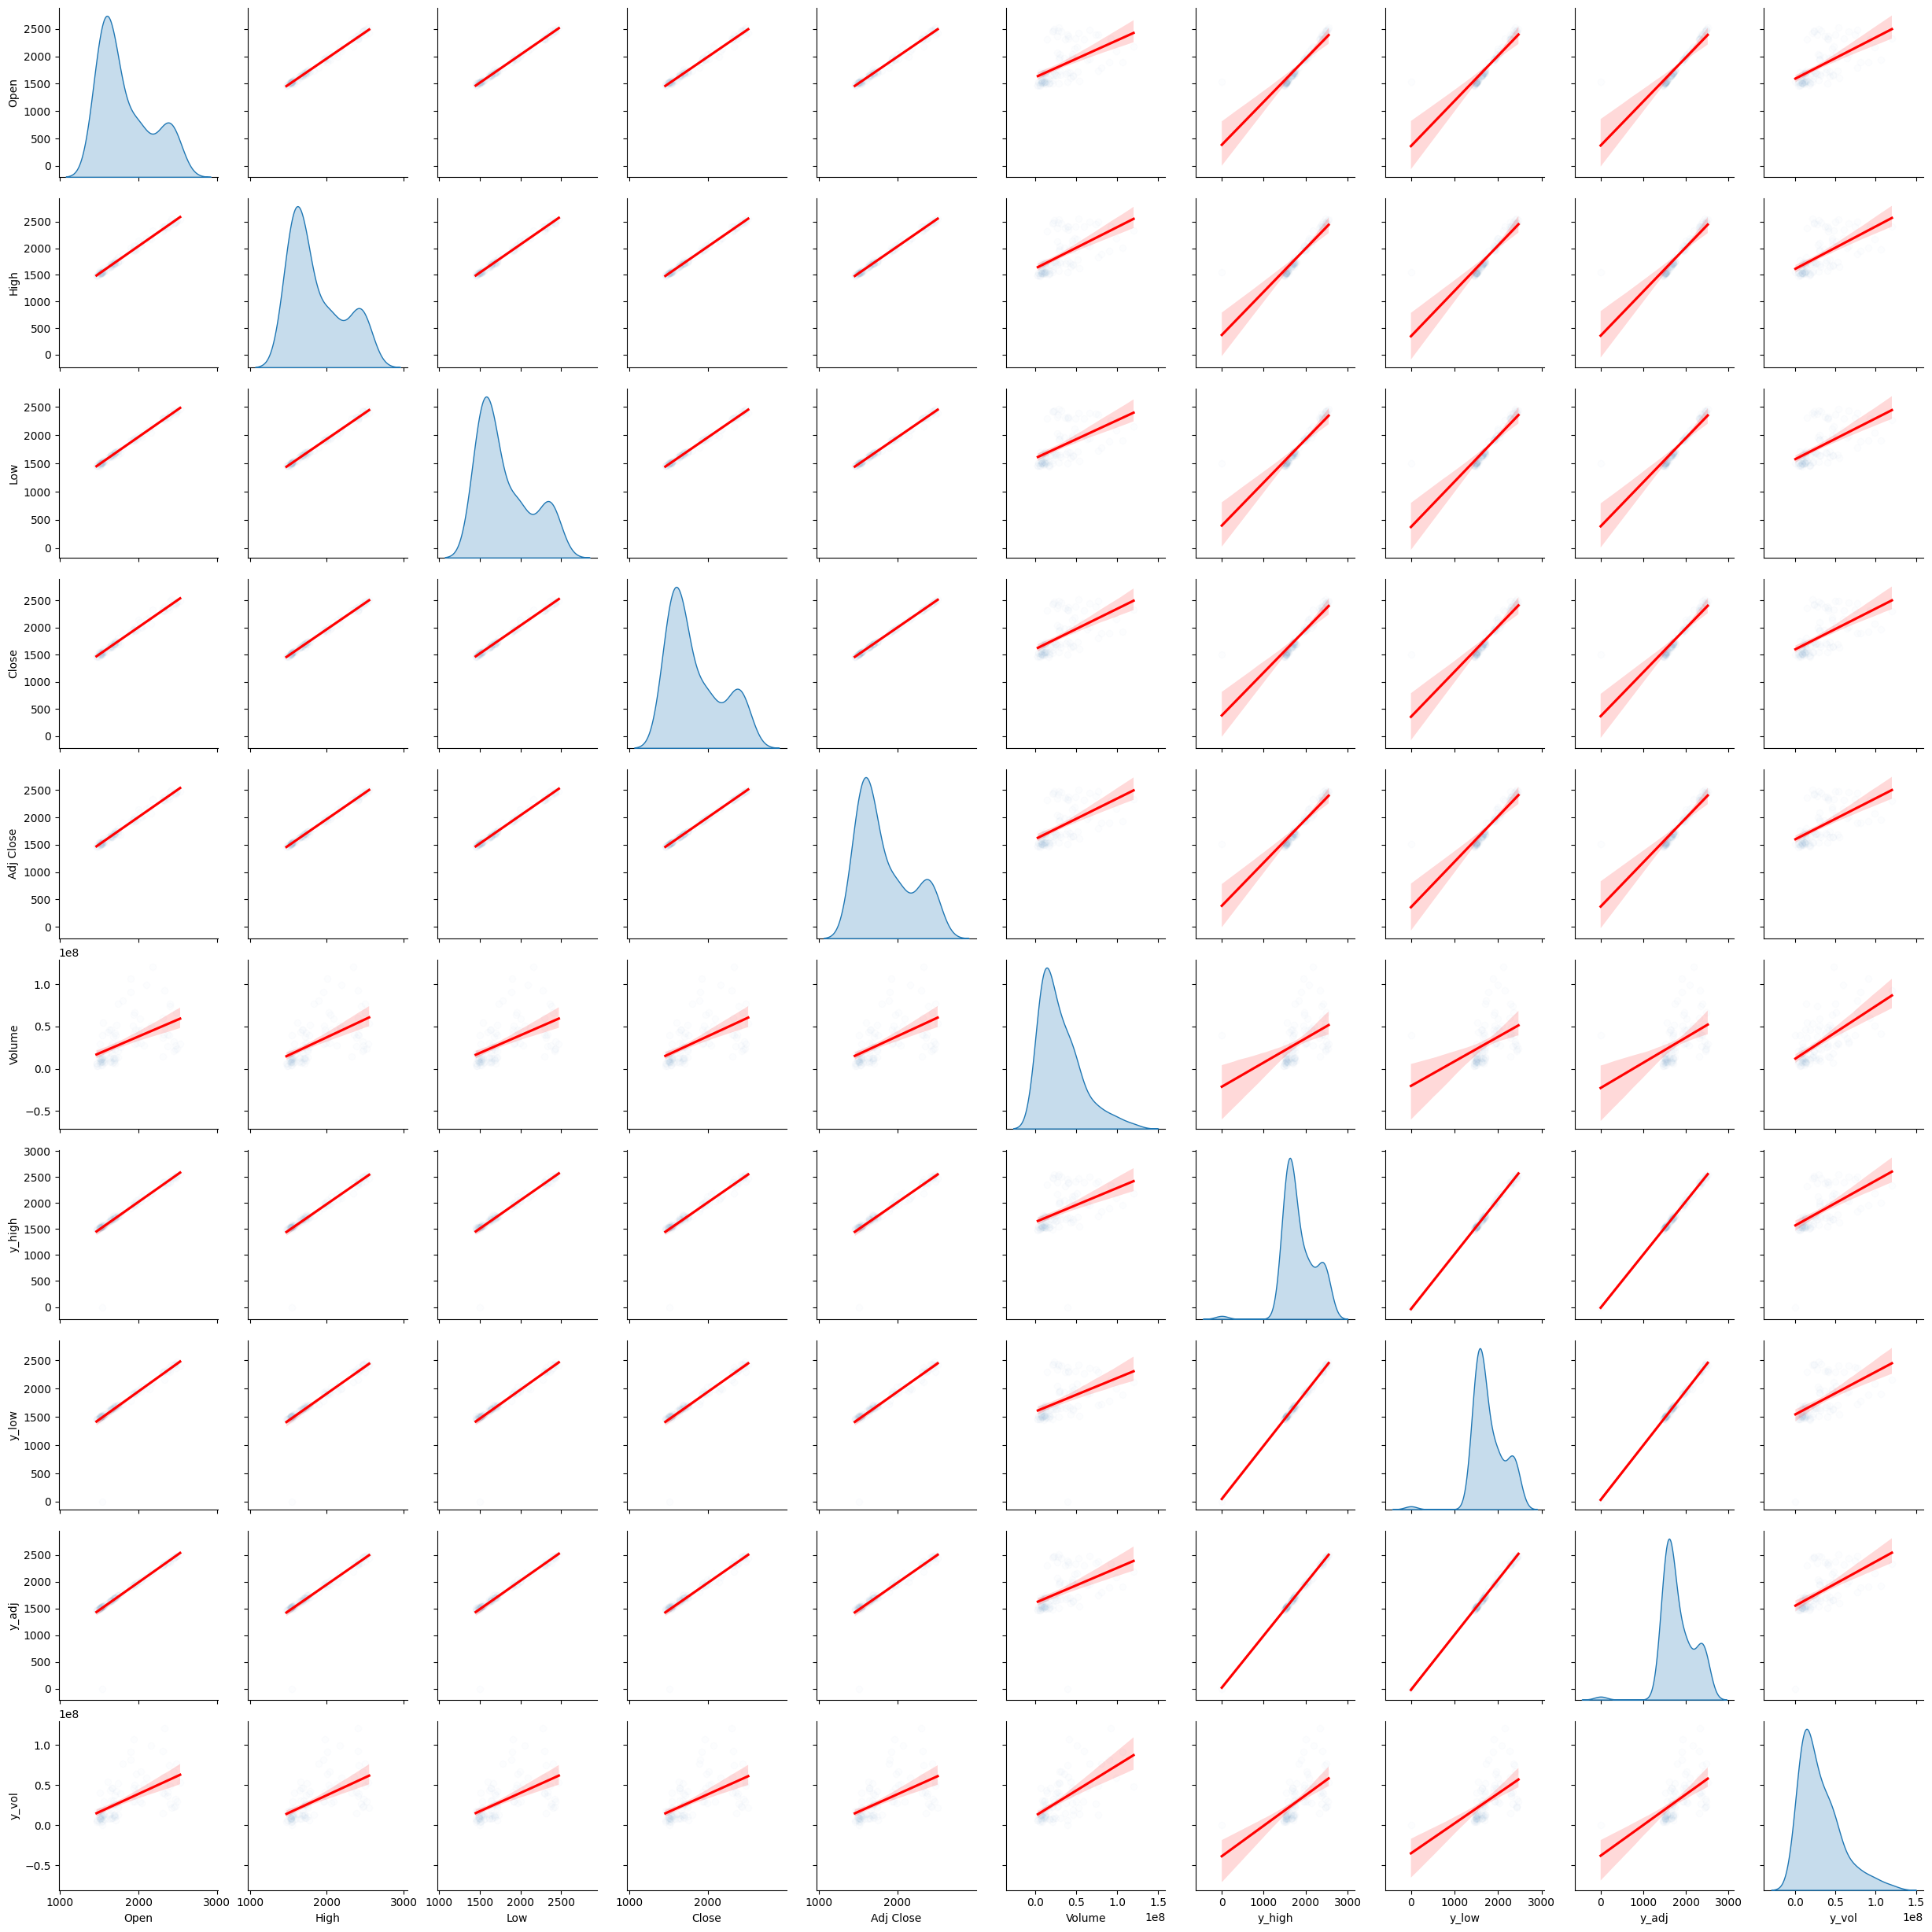

In [ ]:
sns.pairplot(df, diag_kind='kde', kind='reg', plot_kws  ={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.01}})

<Axes: >

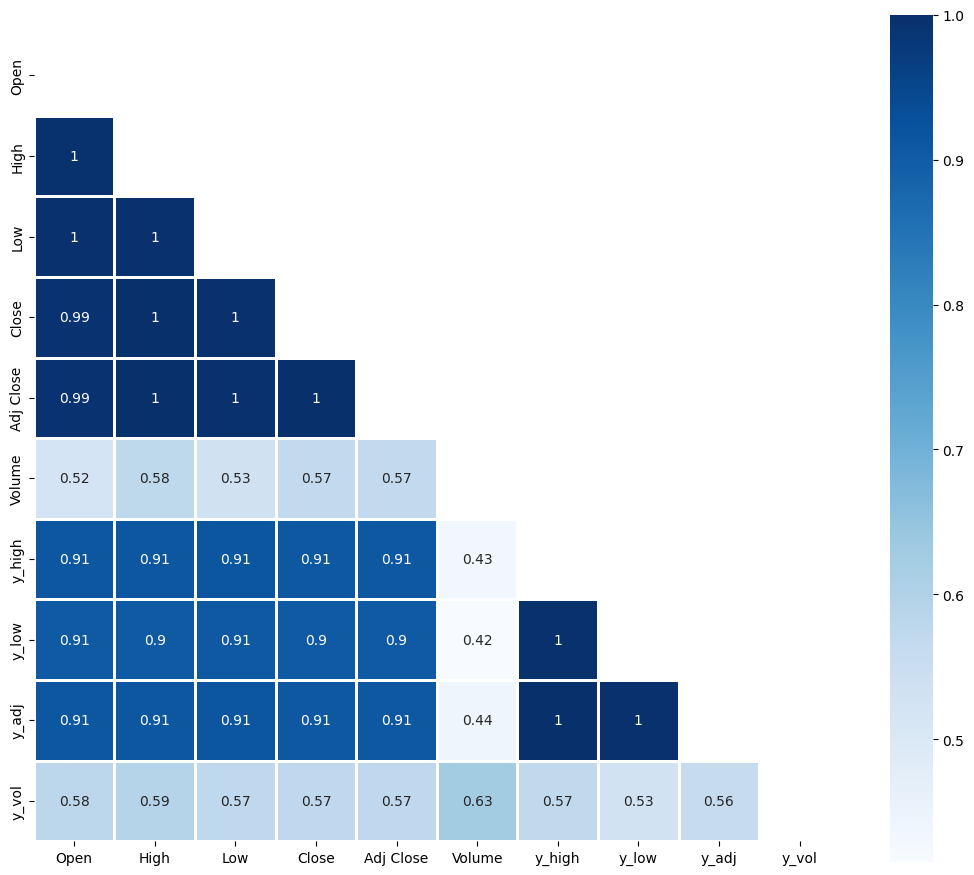

In [ ]:
#Menampilkan heatmap dari dataset

f, ax = plt.subplots(figsize=(13, 11))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap="Blues",mask=mask, square=True,linewidths=1,annot=True)

# Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'y_high',
       'y_low', 'y_adj', 'y_vol'],
      dtype='object')

In [ ]:
X = ['Open', 'y_high', 'y_low', 'y_adj', 'y_vol']
y = ['Close']

In [ ]:
X_train = df[X][1:70]
X_test = df[X][70:]
y_train = df[y][1:70]
y_test = df[y][70:]

# Predict Data Test

In [ ]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = ml.predict(X_test)

print(y_pred)

[[1996.80413273]
 [1957.84383544]
 [1948.52068495]
 [1972.43253561]
 [2036.35433103]
 [2032.71785223]
 [2101.55799272]
 [2184.10011276]
 [2073.60728711]
 [2040.68479149]
 [2001.11170231]
 [2115.95905489]
 [2196.48680045]
 [2326.80957418]
 [2326.41501239]
 [2333.53213243]
 [2331.84961932]
 [2329.92788189]
 [2379.1048218 ]
 [2387.02920663]
 [2397.89331705]
 [2426.00737365]
 [2339.52339376]
 [2389.20868344]
 [2480.9227334 ]
 [2465.72294021]
 [2491.27947394]
 [2465.31042635]
 [2444.74727541]
 [2511.17932721]
 [2504.20540561]
 [2475.30058236]]


In [ ]:
y_test['Prediction'] = y_pred

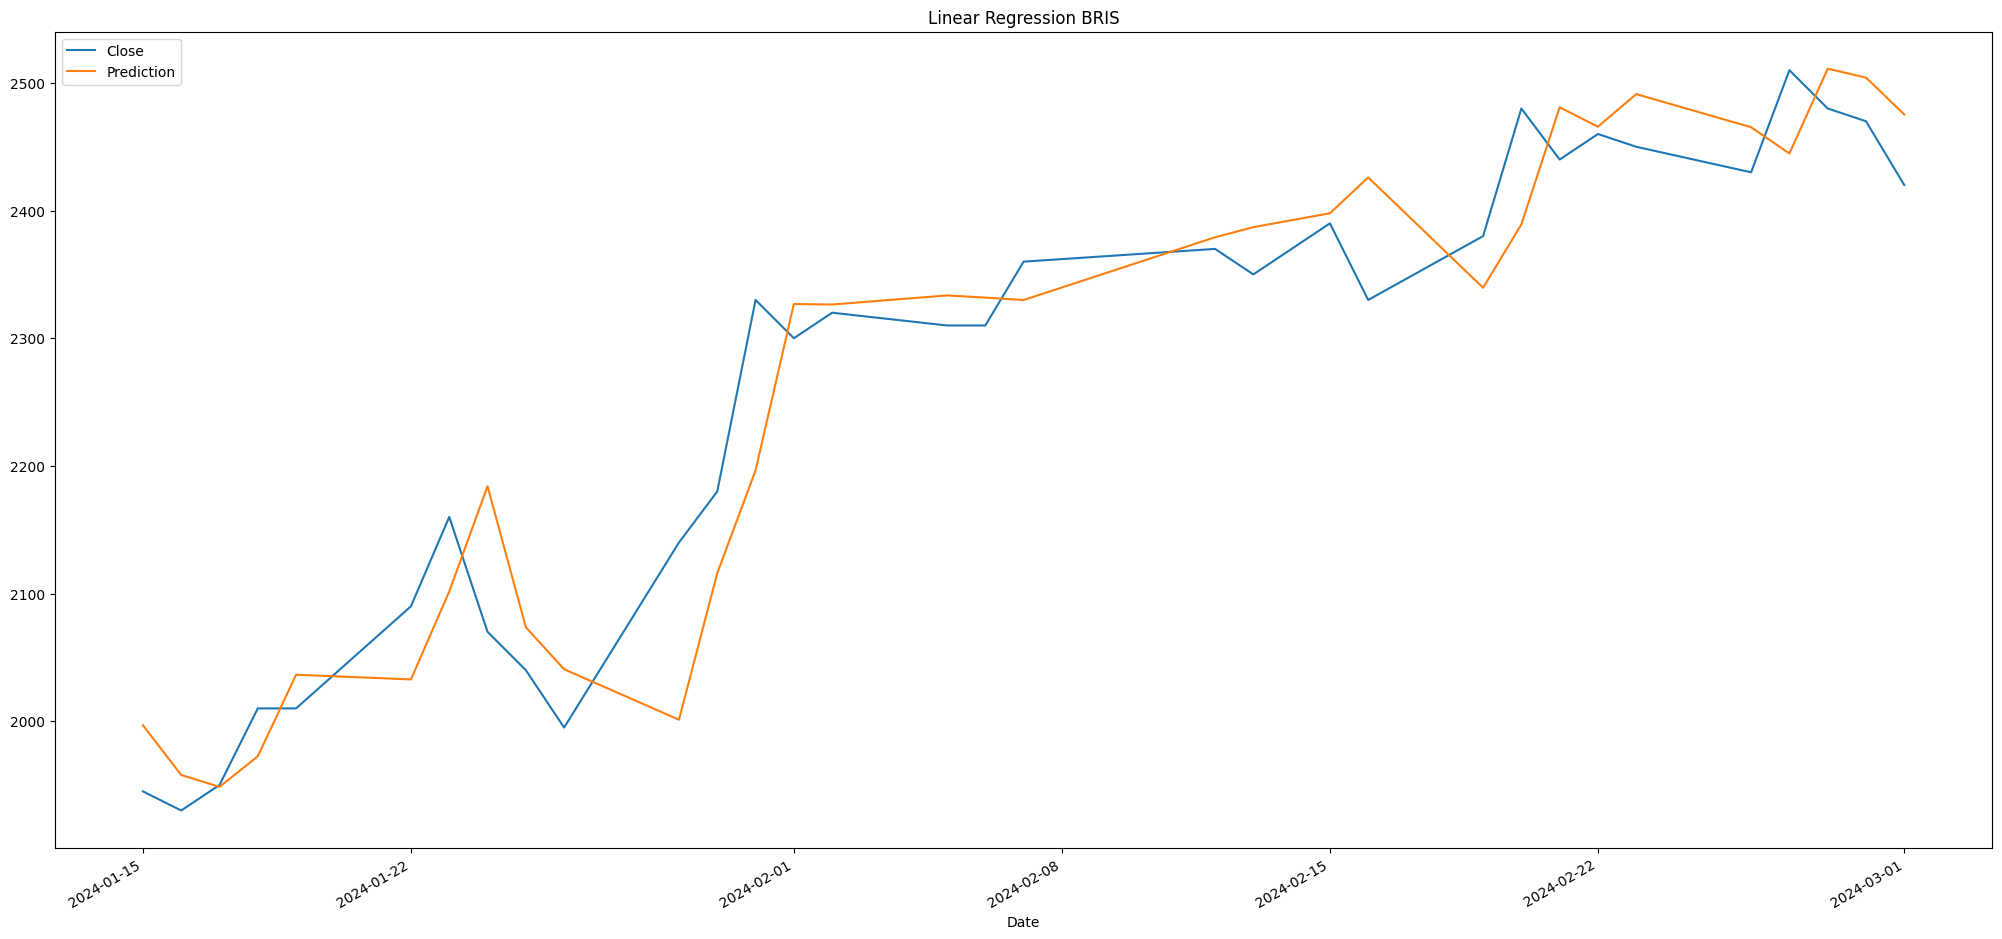

In [ ]:
y_test['Close'].plot(kind = 'line', figsize = (25,12))
y_test['Prediction'].plot(kind = 'line', figsize = (25,12), title = 'Linear Regression BRIS')
plt.legend(['Close', 'Prediction'], loc="upper left")

In [ ]:
y_test['Residual'] = y_test['Close'] - y_test['Prediction']

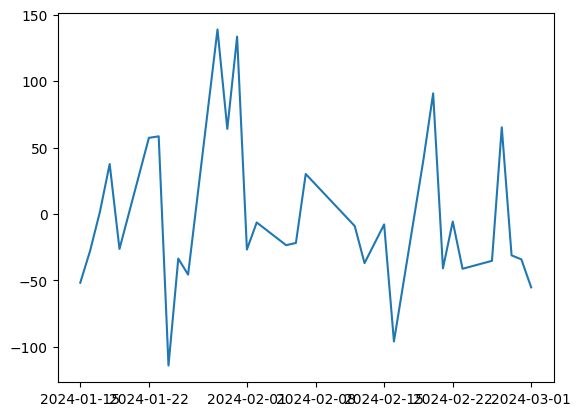

In [ ]:
plt.plot(y_test['Residual'])

# OLS

In [ ]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('Close ~ Open + y_high + y_low + y_adj + y_vol', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1363.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.79e-87
Time:                        23:56:52   Log-Likelihood:                -517.80
No. Observations:                 102   AIC:                             1048.
Df Residuals:                      96   BIC:                             1063.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5220     24.780     -0.061      0.9

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

2.032664913242409